In [57]:
import numpy as np
import matplotlib.pyplot as plt
from lgca import get_lgca
import pickle as pkl
import string
from itertools import cycle
import matplotlib.gridspec as gridspec


In [38]:
plt.style.use(r'C:\Users\Simon Syga\PycharmProjects\biolgca\nature_style.mplstyle')
PATH = '.\\data\\gog\\nonlocaldensity_10reps\\'
parameters = np.load(PATH+'params.npz', allow_pickle=True)
constparams = parameters['constparams'].item()
r_ds = parameters['r_ds']
thetas = parameters['thetas']
reps = 10
# data = np.load(PATH+'n_pr.npy', allow_pickle=True)
stepsize = 1

In [4]:
def label_axes(fig, labels=None, loc=None, **kwargs):
    """
    Walks through axes and labels each.

    kwargs are collected and passed to `annotate`

    Parameters
    ----------
    fig : Figure
         Figure object to work on

    labels : iterable or None
        iterable of strings to use to label the axes.
        If None, lower case letters are used.

    loc : len=2 tuple of floats
        Where to put the label in axes-fraction units
    """
    if labels is None:
        labels = string.ascii_uppercase

    # re-use labels rather than stop labeling
    labels = cycle(labels)
    if loc is None:
        loc = (-0.05, 1.15)
    for ax, lab in zip(fig.axes, labels):
        ax.annotate(lab, xy=loc, ha='right', weight='bold', xycoords='axes fraction', **kwargs)

In [40]:
def plot_migr_rest_spatiotemp(index, reps, lgca, PATH):
    nodes_t = np.empty((constparams['tmax'], constparams['l'], 3), dtype=object)
    lgca.props = {}
    migrating_cells = []
    resting_cells = []
    for i in range(reps):
        p = PATH + 'data{}.pkl'.format(index + (i, 0,))
        with open(p, 'rb') as f:
            d = pkl.load(f)

        lgca.nodes = d['nodes_t']
        lgca.update_dynamic_fields()
        m = lgca.channel_pop[:, :lgca.velocitychannels].sum(-1)
        migrating_cells.append(m)
        resting_cells.append(lgca.cell_density - m)

    mean_migrating_cells = np.mean(migrating_cells, axis=0)
    std_migration = np.std(migrating_cells, axis=0) / np.sqrt(reps)
    mean_resting_cells = np.mean(resting_cells, axis=0)
    std_resting = np.std(resting_cells, axis=0) / np.sqrt(reps)
    plt.plot(mean_resting_cells, label='Resting cells')
    plt.fill_between(np.arange(len(mean_resting_cells)), mean_resting_cells - std_resting,
                     mean_resting_cells + std_resting, alpha=.5)
    plt.plot(mean_migrating_cells, label='Migrating cells')
    plt.fill_between(np.arange(len(mean_migrating_cells)), mean_migrating_cells - std_migration,
                     mean_migrating_cells + std_migration, alpha=.5)

In [39]:
def plot_kappa_spatiotemp(index, reps, lgca, PATH):
    mean_props = []
    for i in range(reps):
        p = PATH+'data{}.pkl'.format(index+(i, 0,))
        with open(p, 'rb') as f:
            d = pkl.load(f)
            mean_props.append(lgca.calc_prop_mean(d['nodes_t'], propname='kappa', props={'kappa': d['kappa']}))

    len(mean_props)
    mean_props = np.ma.array(mean_props)

    mean_prop = np.mean(mean_props, axis=0)
    std_prop = np.std(mean_props, axis=0)  # calculate the standard deviation of the mean
    # n_sample = np.sum(~mean_props.mask, axis=0)  # calculate the number of samples
    # std_mean = std_prop / np.sqrt(n_sample)  # calculate the standard error of the mean
    # Define the window size for the running average
    window_size = 5

    # Define the weights for the running average
    weights = np.repeat(1.0, window_size) / window_size

    # Apply the running average using convolution
    running_average_prop = np.convolve(mean_prop, weights, 'same')
    std_running_average_prop = np.convolve(std_prop, weights, 'same')
    # running_average_prop = np.ma.array(running_average_prop, mask=mean_prop.mask)
    # std_running_average_prop = np.ma.array(std_running_average_prop, mask=mean_prop.mask)

    # ax.plot(np.ma.array(mean_props).T, color='k', alpha=0.5, lw=.5)
    plt.plot([0, len(mean_prop)], [0, 0], 'k--')
    plt.plot(mean_prop, lw=1)
    # fill the area between the mean and the standard deviation
    plt.fill_between(np.arange(len(mean_prop)), mean_prop-std_prop, mean_prop+std_prop, alpha=.5)
    # plt.plot(running_average_prop)
    # plt.fill_between(np.arange(len(mean_prop)), running_average_prop-std_running_average_prop, running_average_prop+std_running_average_prop, alpha=.5)

In [5]:
restchannels = 1
l = 1001
dims = l, l
capacity = 100
# interaction parameters
r_b = 1. # initial birth rate
# r_d = 0.2 # initial death rate
nodes = np.zeros((l,)+(2+restchannels,), dtype=int)
nodes[l//2, -1] = capacity
kappa = np.random.random(capacity) * 8 - 4

In [6]:
with open('lgca1.pkl', 'rb') as f:
    lgca1 = pkl.load(f)

with open('lgca2.pkl', 'rb') as f:
    lgca2 = pkl.load(f)

with open('lgca3.pkl', 'rb') as f:
    lgca3 = pkl.load(f)

In [7]:
# lgca1 = get_lgca(ib=True, bc='reflect', interaction='go_or_grow_kappa', dims=l, nodes=nodes, ve=False, geometry='lin',
#                 r_b=r_b, capacity=capacity, r_d=0., kappa=kappa, theta=.2, kappa_std=.2)
#
# lgca1.timeevo(1000, record=True, recordN=False)
# with open('lgca1.pkl', 'wb') as f:
#     pkl.dump(lgca1, f)
# lgca = pkl.load(open('example_lgca.pkl', 'rb'))

In [8]:
# lgca2 = get_lgca(ib=True, bc='reflect', interaction='go_or_grow_kappa', dims=l, nodes=nodes, ve=False, geometry='lin',
#                 r_b=r_b, capacity=capacity, r_d=0.2, kappa=kappa, theta=.2, kappa_std=.2)
#
# lgca2.timeevo(1000, record=True, recordN=False)
# with open('lgca2.pkl', 'wb') as f:
#     pkl.dump(lgca2, f)

In [9]:
# lgca3 = get_lgca(ib=True, bc='reflect', interaction='go_or_grow_kappa', dims=l, nodes=nodes, ve=False, geometry='lin',
#                 r_b=r_b, capacity=capacity, r_d=0.2, kappa=kappa, theta=1., kappa_std=.2)
#
# lgca3.timeevo(1000, record=True, recordN=False)
# with open('lgca3.pkl', 'wb') as f:
#     pkl.dump(lgca3, f)



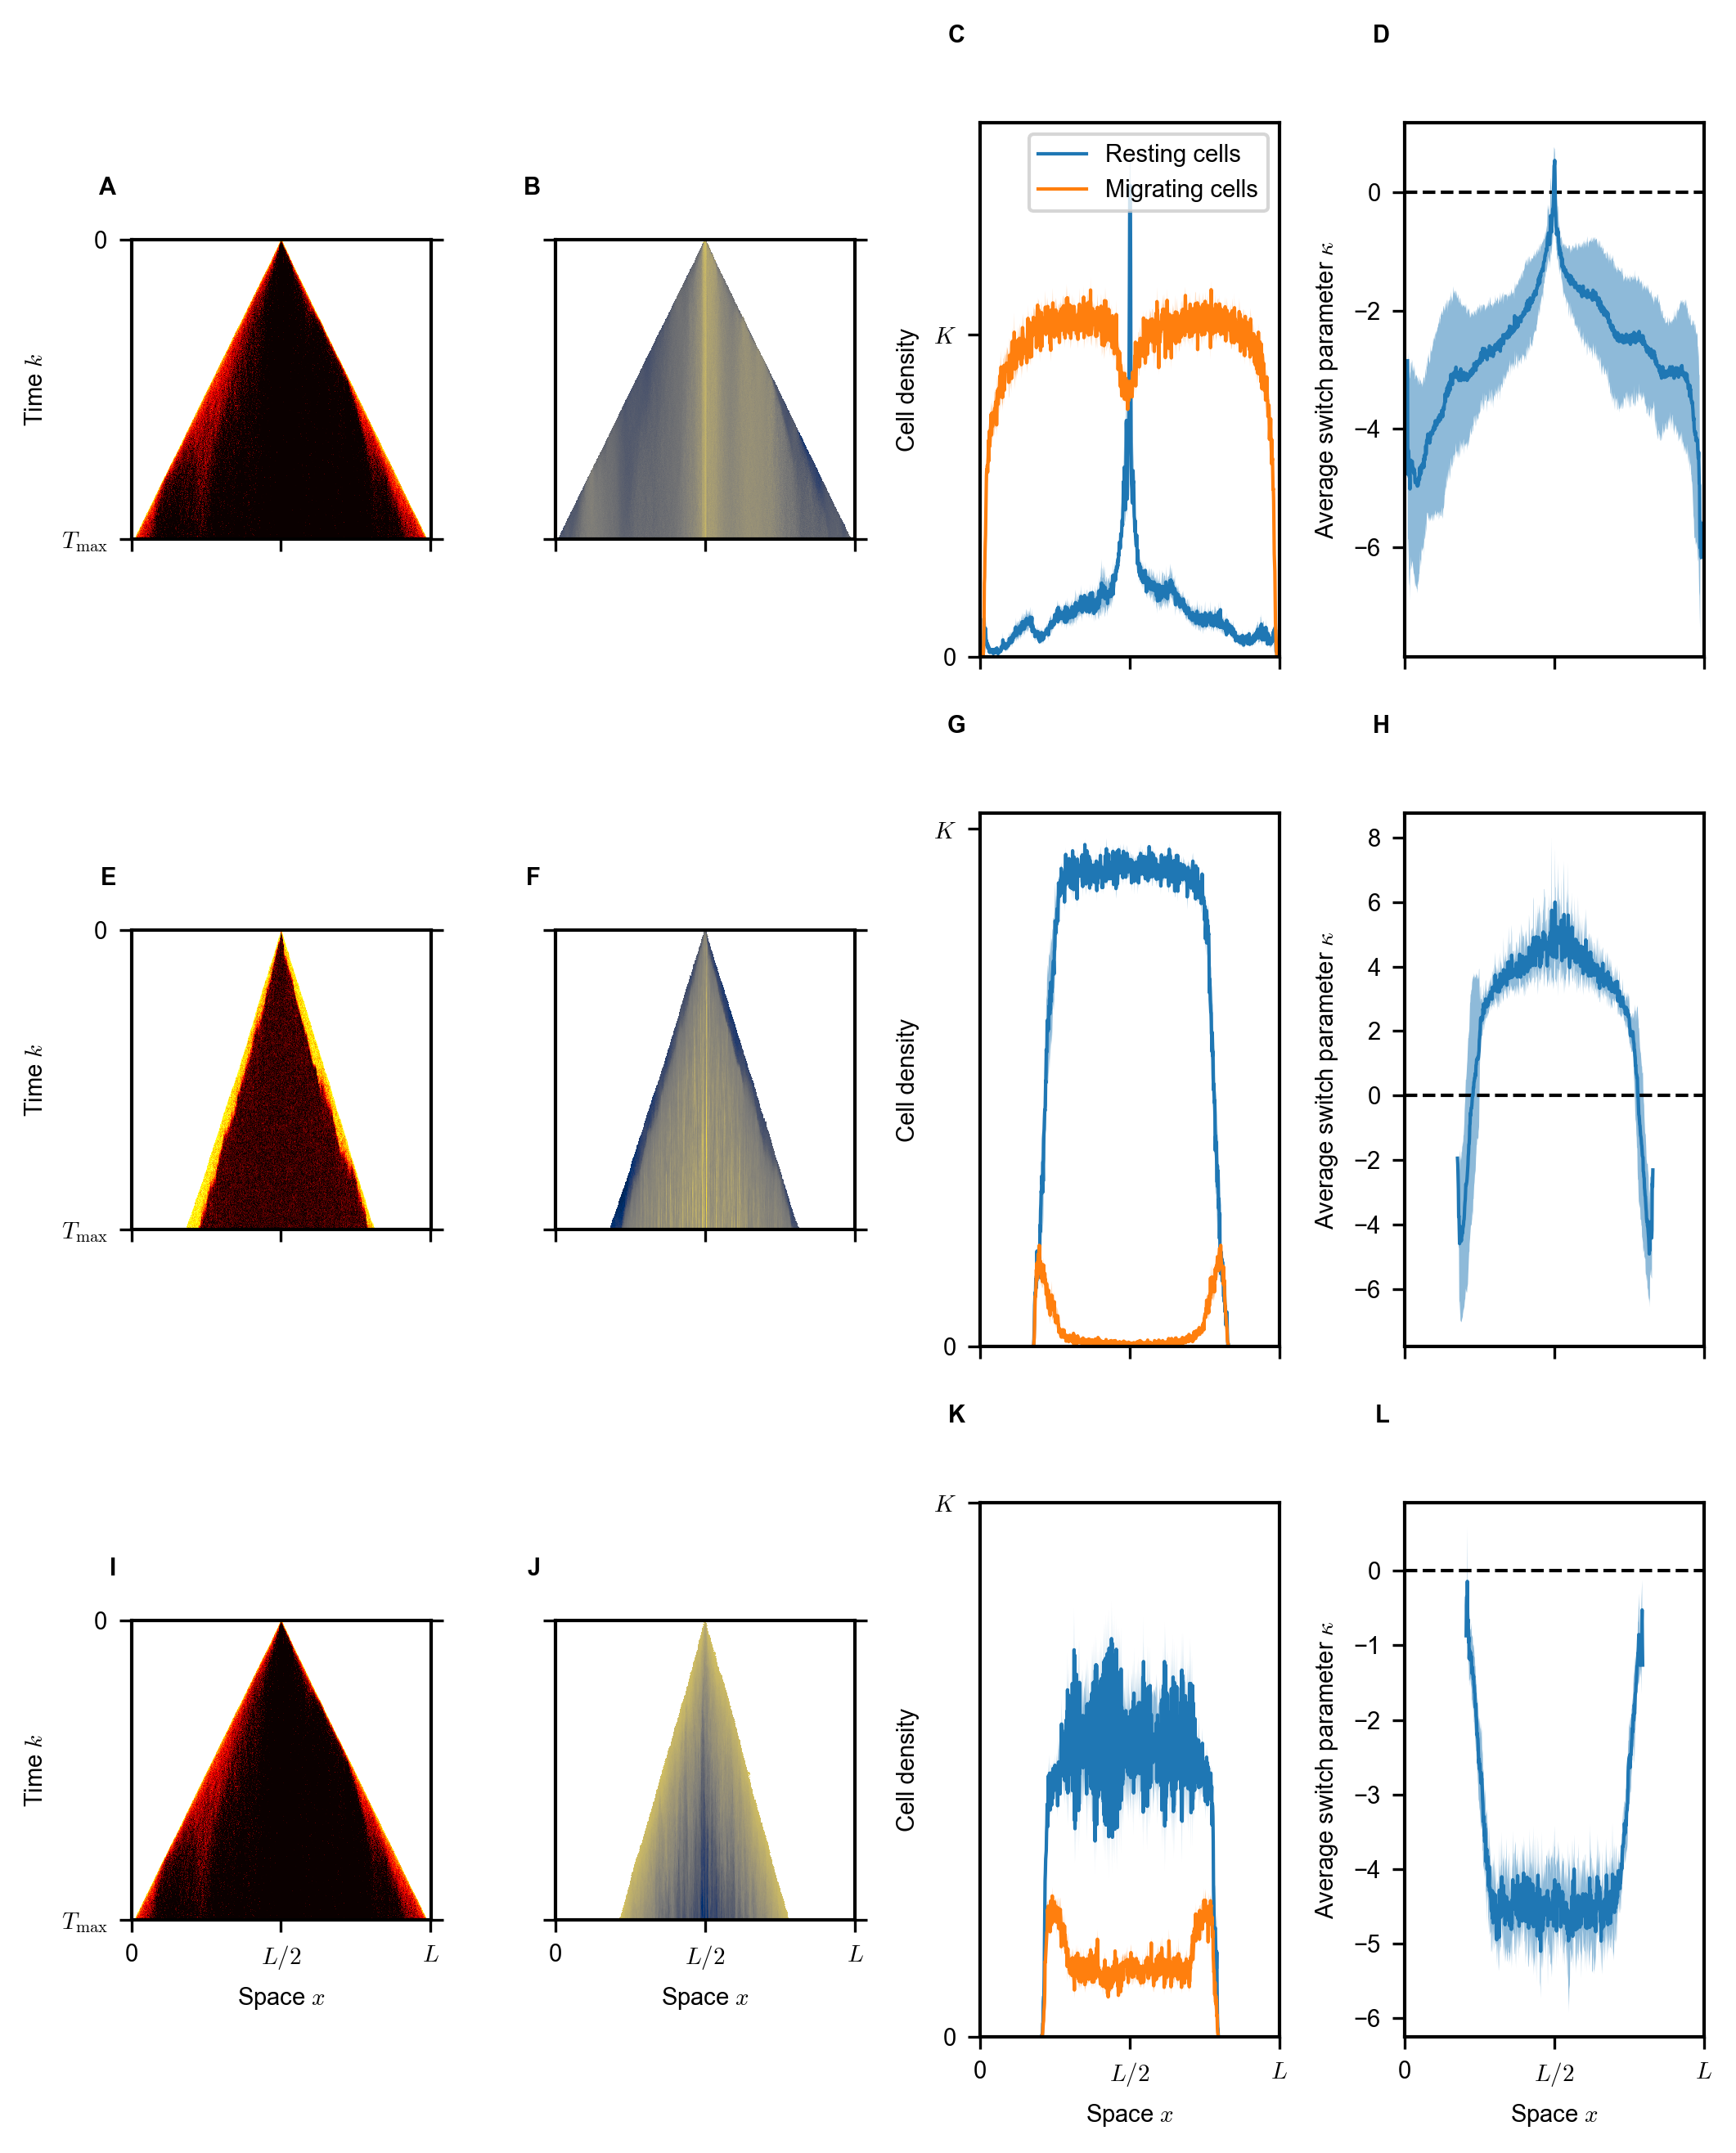

In [56]:
# get figsize from style
figsize = 7.086614, 8.858268
fig, axes = plt.subplots(3, 4, sharex=True, sharey=False, figsize=figsize)
plt.sca(axes[0, 0])
ax = axes[0, 0]
lgca1.plot_density(absolute_max=100, figsize=figsize, cbarlabel=r'Cell density $\rho$', cbar=False)
plt.ylabel(r'Time $k$')
ax.set_yticks([0, 1000], [0, '$T_{\mathrm{max}}$'])
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
plt.xlabel('')

plt.sca(axes[0, 1])
ax = axes[0, 1]
lgca1.plot_prop_spatial(propname='kappa', cbarlabel=r'Switch parameter $\kappa$', figsize=figsize, cbar=False)
plt.ylabel(r'')
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
plt.xlabel('')
plt.yticks([0, 1000], ['', ''])

plt.sca(axes[1, 0])
ax = axes[1, 0]
lgca2.plot_density(absolute_max=100, figsize=figsize, cbarlabel=r'Cell density $\rho$', cbar=False)
plt.ylabel(r'Time $k$')
ax.set_yticks([0, 1000], [0, '$T_{\mathrm{max}}$'])
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
plt.xlabel('')

plt.sca(axes[1, 1])
ax = axes[1, 1]
lgca2.plot_prop_spatial(propname='kappa', cbarlabel=r'Switch parameter $\kappa$', figsize=figsize, cbar=False)
plt.ylabel(r'')
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
plt.xlabel('')
plt.yticks([0, 1000], ['', ''])

plt.sca(axes[2, 0])
ax = axes[2, 0]
lgca1.plot_density(absolute_max=100, figsize=figsize, cbarlabel=r'Cell density $\rho$', cbar=False)
plt.ylabel(r'Time $k$')
plt.xlabel(r'Space $x$')
ax.set_yticks([0, 1000], [0, '$T_{\mathrm{max}}$'])
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

plt.sca(axes[2, 1])
ax = axes[2, 1]
lgca3.plot_prop_spatial(propname='kappa', cbarlabel=r'Switch parameter $\kappa$', figsize=figsize, cbar=False)
plt.ylabel(r'')
plt.xlabel(r'Space $x$')
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
plt.yticks([0, 1000], ['', ''])


ax.set_xticks([0, 500, 1001], [0, r'$L/2$', '$L$'])


index = 0, 2
plt.sca(axes[0, 2])
plot_migr_rest_spatiotemp(index, reps, lgca1, PATH)
# plt.title(r'$\delta={}, \theta={}$'.format(r_ds[index[0]], thetas[index[1]]))
plt.ylabel(r'Cell density')
plt.xlim(0, constparams['l'])
plt.yticks(ticks=[0, 100], labels=[0, r'$K$'])
plt.ylim(0)
plt.legend(loc='best')
plt.sca(axes[0, 3])
plot_kappa_spatiotemp(index, reps, lgca1, PATH)
plt.ylabel(r'Average switch parameter $\kappa$')
plt.xlim(0, constparams['l'])
plt.xticks(ticks=[0, 500, 1000], labels=[0, r'$L/2$', r'$L$'])

index = (4, 2)
plt.sca(axes[1, 2])
plot_migr_rest_spatiotemp(index, reps, lgca1, PATH)
# plt.title(r'$\delta={}, \theta={}$'.format(r_ds[index[0]], thetas[index[1]]))
plt.ylabel(r'Cell density')
plt.xlim(0, constparams['l'])
plt.yticks(ticks=[0, 100], labels=[0, r'$K$'])
plt.ylim(0)
plt.sca(axes[1, 3])
plot_kappa_spatiotemp(index, reps, lgca1, PATH)
plt.ylabel(r'Average switch parameter $\kappa$')
plt.xlim(0, constparams['l'])
plt.xticks(ticks=[0, 500, 1000], labels=[0, r'$L/2$', r'$L$'])

index = (4, 8)
plt.sca(axes[2, 2])
plot_migr_rest_spatiotemp(index, reps, lgca1, PATH)
# plt.title(r'$\delta={}, \theta={}$'.format(r_ds[index[0]], thetas[index[1]]))
plt.ylabel(r'Cell density')
plt.xlim(0, constparams['l'])
plt.yticks(ticks=[0, 100], labels=[0, r'$K$'])
plt.ylim(0)
plt.xlabel(r'Space $x$')
plt.sca(axes[2, 3])
plot_kappa_spatiotemp(index, reps, lgca1, PATH)
plt.xlabel(r'Space $x$')
plt.ylabel(r'Average switch parameter $\kappa$')
plt.xlim(0, constparams['l'])
plt.xticks(ticks=[0, 500, 1000], labels=[0, r'$L/2$', r'$L$'])

label_axes(fig)
plt.tight_layout()
# plt.savefig(r'goorgrow/figures/cell_density_and_local_kappa.svg')
# plt.savefig(r'goorgrow/figures/cell_density_and_local_kappa.pdf')


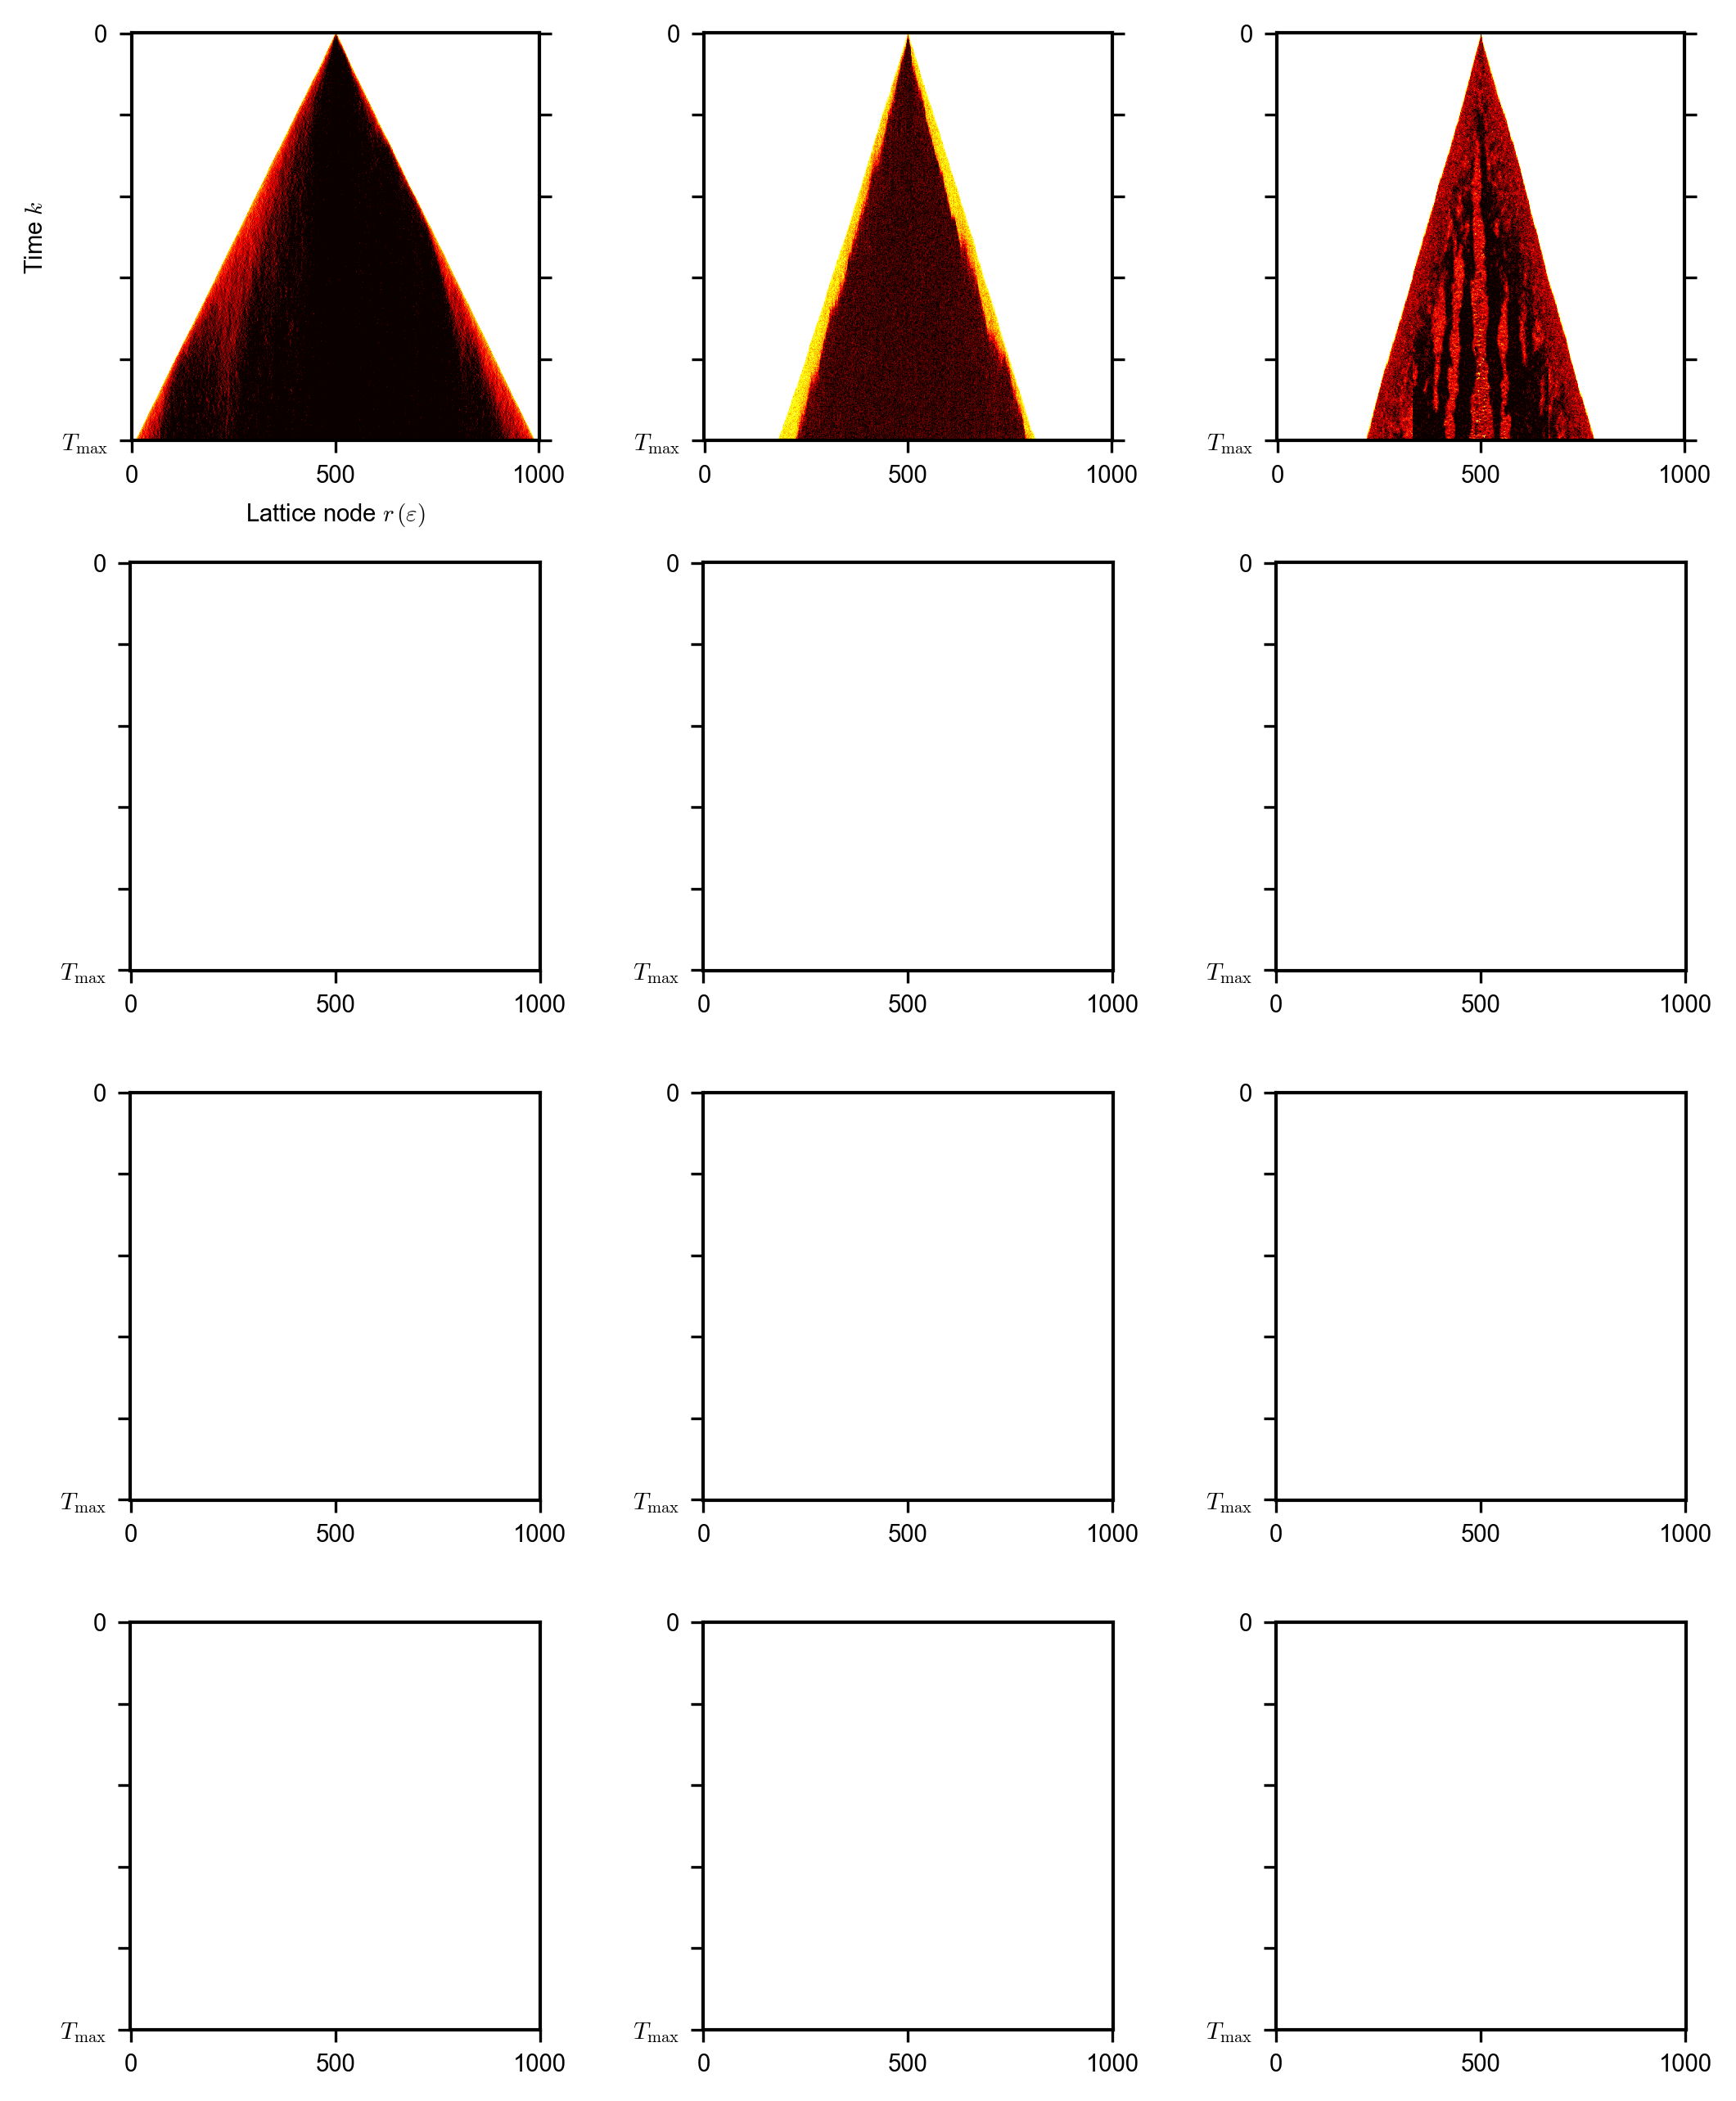

In [69]:
gs = gridspec.GridSpec(4, 3)
fig = plt.figure(figsize=figsize)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1, sharex=ax1)
ax3 = fig.add_subplot(gs[0, 2], sharey=ax1, sharex=ax1)
ax4 = fig.add_subplot(gs[1, 0], sharey=ax1, sharex=ax1)
ax5 = fig.add_subplot(gs[1, 1], sharey=ax1, sharex=ax1)
ax6 = fig.add_subplot(gs[1, 2], sharey=ax1, sharex=ax1)
ax7 = fig.add_subplot(gs[2, 0], sharey=ax1, sharex=ax1)
ax8 = fig.add_subplot(gs[2, 1], sharey=ax1, sharex=ax1)
ax9 = fig.add_subplot(gs[2, 2], sharey=ax1, sharex=ax1)
ax10 = fig.add_subplot(gs[3, 0], sharey=ax1, sharex=ax1)
ax11 = fig.add_subplot(gs[3, 1], sharey=ax1, sharex=ax1)
ax12 = fig.add_subplot(gs[3, 2], sharey=ax1, sharex=ax1)

plt.sca(ax1)
ax = ax1
lgca1.plot_density(absolute_max=100, figsize=figsize, cbarlabel=r'Cell density $\rho$', cbar=False)
plt.ylabel(r'Time $k$')
ax.set_yticks([0, 1000], [0, '$T_{\mathrm{max}}$'])
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()


plt.sca(ax2)
ax = ax2
lgca2.plot_density(absolute_max=100, figsize=figsize, cbarlabel=r'Cell density $\rho$', cbar=False)
plt.ylabel(r'')
# ax.set_yticks([0, 1000], ['', ''])
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()
plt.xlabel('')

plt.sca(ax3)
ax = ax3
lgca3.plot_density(absolute_max=100, figsize=figsize, cbarlabel=r'Cell density $\rho$', cbar=False)
plt.ylabel(r'')
plt.xlabel(r'')
# ax.set_yticks([0, 1000], ['', ''])
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()